# <center> Supervised Machine Learning (ECOM6306) <br> Programming assignment <br>  <br> Baraa Wael Abu Sallout</center>

## Part 1
### 1. Write a Python function that computes the value of the Gaussian distribution N(𝝁, Σ), at a given vector x. 

![alt text](Multivariate_Density.png "Multivariate_Density")
$$
%\left(
\Sigma =
\begin{bmatrix}
\sigma^2_{1} & ... & \sigma^2_{1d} \\
 :& : &  : \\
\sigma^2_{d1} & ... &  \sigma^2_{d} 
\end{bmatrix}
%\right)
$$

$$
\mathbf{X}=\begin{bmatrix}
\mathbf{x}_1 & ... & \mathbf{x}_{d} 
\end{bmatrix}^T
$$

$$
\mu=\begin{bmatrix}
\mu_1 & ... & \mu_{d} 
\end{bmatrix}^T
$$

- $\Sigma$ : covariance matrix
- $\mu_i$ : Mean
- Each $x_i$ is $N(\mu_i , \sigma^2_i )$


In [2]:
# Imports
%matplotlib inline
%config InlineBackend.figure_formats = ['svg']

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm # Colormaps
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

sns.set_style('darkgrid')
np.random.seed(42)
#

In [3]:
def gauss_density_value(x, d, mean, covariance):
    x_m = x - mean
    return (1. / (np.sqrt((2 * np.pi)**d * np.linalg.det(covariance))) *np.exp(-(np.linalg.solve(covariance, x_m).T.dot(x_m)) / 2))

In [4]:
dimensions = 3  # number of dimensions
mean = np.array([[1], [2], [2]])  # Mean
covariance = np.array([[1., 0.,0.],  [0., 5.,2.],[0., 2.,5.]])# Covariance
x = np.array([[0.5], [0], [1]])  # Covariance
gauss_density_value(x, dimensions, mean, covariance)

array([[0.00815733]])

### 2. gauss_classes_generation: Write a Python function that generates a data set of N dimensional vectors that stem from c different Gaussian distribution import packages
####  ــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــ
### 3- bayes classifier: Write a Python function that will take  <br> as inputs:
####  &emsp; (a) the mean vectors,<br>  &emsp; (b) the covariance matrices of the class distributions of a c-class problem, <br> &emsp; (c) the a priori probabilities of the c classes, and <br>  &emsp;  (d) a matrix X containing column vectors that stem from the given classes.
#### &emsp; It will give as output an N-dimensional vector whose i th component contains the class where the corresponding vector is assigned, according to the Bayesian classification rule.
####  ــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــ
### 4- euclidean_classifier: Write a Python function that will take as inputs:
#### (a) the mean vectors, <br> (b) the covariance matrices of the class distributions of a c-class problem, <br>(c) the a priori probabilities of the c classes, and <br>(d) a matrix X containing column vectors that stem from the given classes. <br>It will give as output an N-dimensional vector whose i th component contains the class where the corresponding vector is assigned, according to the minimum Euclidean distance classifier.
####  ــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــ
### 5- mahalanobis_classifier: Write a Python function that will take as inputs:
#### (a) the mean vectors, <br> (b) the covariance matrices of the class distributions of a c-class problem, <br>(c) the a priori probabilities of the c classes, and <br>(d) a matrix X containing column vectors that stem from the given classes. <br>It will give as output an N-dimensional vector whose i th component contains the class where the corresponding vector is assigned, according  minimum Mahalanobis distance classifier. 

#### To create samples in some classes I made a function in such a way that it can be generalized for the number of classes I want to create:
###### Where:
###### numberOfClasses: the number of classes I want to create.
###### datasize: the total size of the data I want to generate.
###### p: a list of all a priori probabilities
###### listofM: a list of all μ
###### listofS: a list of all Σ

##### The function returns a list of NumPy arrays, 1 array for each class

In [5]:
import numpy as np
import math
def createMultivariateClassData(numberOfClasses,datasize,p,listofμ,listofΣ):
    listOfData=[]
    numberOfSamplesCreated=0 #check how many we have created so last class rounds to datasize!!!!
    for i in range(numberOfClasses-1):
        classSize=math.floor(datasize*p[i])
        listOfData.append(np.random.multivariate_normal(listofμ[i],listofΣ[i],size=classSize))
        numberOfSamplesCreated=numberOfSamplesCreated+classSize
    #for last class we need to take the remaining samples cause for sum of p we might not have round number of data
    lastclassSize=datasize-numberOfSamplesCreated
    listOfData.append(np.random.multivariate_normal(listofμ[-1],listofΣ[-1],size=lastclassSize))
    return listOfData


#### For bayes classifier we use this equation.

![alt text](bsyC.png "bayes_classifier equ")

In [8]:
def classifyFunc(d,x,m,s,pw):
    c = x - m  
    if d>1:
        detS=round(abs(np.linalg.det(s)),4) 
        invS=np.linalg.inv(s)
        g = -0.5 * (c.T).dot(invS).dot(c) - (d / 2) * math.log(2 * math.pi) - 0.5 * math.log(detS) + math.log(pw)
    else:
        detS=abs(s)
        invS=s**-1
        g = -0.5 * c**2*invS- (d / 2) - (d / 2) * math.log(2 * math.pi) - 0.5 * math.log(detS) + math.log(pw)
    return g

def euclidianDistance(x1,x2,d):
    if d==1:
        distance= np.sqrt(np.sum(np.square(x1 - x2)))
    else:
        distance=np.sqrt(np.sum((x1-x2).T.dot(x1-x2)))
    return distance

def mahalanobisDistance(x,m,s,d):
    c=x-m
    if d>1:
        invS=np.linalg.inv(s)
        distance = np.sqrt(c.T.dot(invS).dot(c))
    else:
        invS = s ** -1
        distance = math.sqrt(c*invS*c)
    return distance

In [9]:
import scipy as sp
def bayes_classifier(x,listofμ,listofΣ,pw ,d):
    print("X-sample:\n{0}".format(x))
    bayesclassify = np.empty([len(listofμ)])    
    for i in np.arange(len(listofμ)):
        bayesclassify[i] = classifyFunc(d,x,listofμ[i],listofΣ[i],pw[i]) 
        print("Bayesian classification for X-sample to class {0} = {1}".format(i+1,bayesclassify[i]) )
    indexClassContain = next(i for i,x in enumerate(bayesclassify) if x == max(bayesclassify))

    print("By maximum Bayesian classification belongs to >> class {0}  \n *********************** \n ".format(indexClassContain+1,max(bayesclassify),x) )

    return ""

def euclidean_classifier(x,listofμ,listofΣ):
    print("X-sample:\n{0}".format(x))
    distance = np.empty([len(listofμ)])    
    for i in np.arange(len(listofμ)):
        distance[i] = (x - listofμ[i]).dot((x - listofμ[i]).transpose()) 
        print("Euclidean distance for X-sample to class {0} = {1}".format(i+1,distance[i]) )
    indexClassContain = next(i for i,x in enumerate(distance) if x == min(distance))

    print("By minimum euclidean distance classifier belongs to >> class {0}  \n *********************** \n ".format(indexClassContain+1,min(distance),x) )

    return ""

def mahalanobis_classifier(x,listofμ,listofΣ):
    distance = np.empty([len(listofμ)])    
    print("X-sample:\n{0}".format(x))
    for i in np.arange(len(listofμ)):
        
        distance[i] = (x - listofμ[i]).dot(np.linalg.inv(listofΣ[i])).dot((x - listofμ[i]).transpose())
        print("Mahalanobis distance for X-sample to class {0} = {1}".format(i+1,distance[i]) )
    indexClassContain = next(i for i,x in enumerate(distance) if x == min(distance))

    print("By minimun mahalanobis distance classifier belongs to >> class {0}  \n *********************** \n ".format(indexClassContain+1,min(distance),x) )

    return ""



##### Classification error for Bayesian Classifier


In [10]:
def classification_error_Bayesian(test_data,μ,Σ,p,testsize):
    bayesianFalses=0
    for j in np.arange(len(μ)):
        for i in range(test_data[j].shape[0]):
            distanceto1=classifyFunc(3,test_data[j][i],μ[0],Σ[0],p[0])
            distanceto2=classifyFunc(3,test_data[j][i],μ[1],Σ[1],p[1])
            distanceto3=classifyFunc(3,test_data[j][i],μ[2],Σ[2],p[2])
            if(j ==0):
                if distanceto1<distanceto2 or distanceto1<distanceto3:
                    bayesianFalses= bayesianFalses + 1
            if(j ==1):
                if distanceto2 < distanceto1 or distanceto2 < distanceto3:
                    bayesianFalses = bayesianFalses + 1
            if(j ==2):
                if distanceto3 < distanceto1 or distanceto3 < distanceto2:
                    bayesianFalses = bayesianFalses + 1
    bayesianError=bayesianFalses/testsize
    print("Bayesian Minimun Distance Classifier Error:",bayesianError," Using theoretical Mean and Covariance")

##### Classification error for Euclidian Classifier

In [13]:
def classification_error_Euclidian(test_data,μ,testsize):
    euclidianFalses=0
    for j in np.arange(len(μ)):
        for i in range(test_data[j].shape[0]):
            distanceto1=euclidianDistance(test_data[j][i],μ[0],3)
            distanceto2=euclidianDistance(test_data[j][i],μ[1],3)
            distanceto3=euclidianDistance(test_data[j][i],μ[2],3)
            if(j ==0):
                if distanceto1>distanceto2 or distanceto1>distanceto3:
                    euclidianFalses= euclidianFalses + 1
            if(j ==1):
                if distanceto2 > distanceto1 or distanceto2 > distanceto3:
                    euclidianFalses = euclidianFalses + 1
            if(j ==2):
                if distanceto3 > distanceto1 or distanceto3 > distanceto2:
                    euclidianFalses = euclidianFalses + 1
    euclidianError=euclidianFalses/testsize
    print("Euclidian Minimun Distance Classifier Error:",euclidianError," Using theoretical Mean and Covariance")

##### Classification error for mahalanobis Classifier

In [14]:
def classification_error_mahalanobis(test_data,μ,Σ,testsize):
    mahalanobisFalses=0
    for j in np.arange(len(μ)):
        for i in range(test_data[j].shape[0]):
            distanceto1=mahalanobisDistance(test_data[j][i],μ[0],Σ[0],3)
            distanceto2=mahalanobisDistance(test_data[j][i],μ[1],Σ[1],3)
            distanceto3=mahalanobisDistance(test_data[j][i],μ[2],Σ[2],3)
            if(j ==0):
                if distanceto1>distanceto2 or distanceto1>distanceto3:
                    mahalanobisFalses= mahalanobisFalses + 1
            if(j ==1):
                if distanceto2 > distanceto1 or distanceto2 > distanceto3:
                    mahalanobisFalses = mahalanobisFalses + 1
            if(j ==2):
                if distanceto3 > distanceto1 or distanceto3 > distanceto2:
                    mahalanobisFalses = mahalanobisFalses + 1
    mahalanobisFalses=mahalanobisFalses/testsize
    print("mahalanobisFalses Minimun Distance Classifier Error:",mahalanobisFalses," Using theoretical Mean and Covariance")

## Part 2
### ![alt text](part2task1.png "part2task1")

Task 1 part a
sample of dataset: [3.24365891 2.52302986] [0.18886892 0.76586304] .... [-0.60532598  0.53427025]


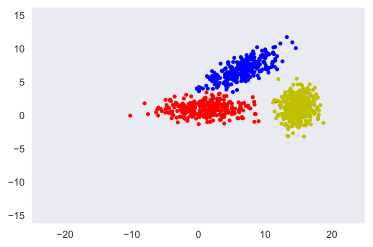

In [10]:
print("Task 1 part a")
trainsize=1000
d =2
p1=p2=p3=0.3
listofP=[p1,p2,p3]

μ1=np.array([1,1])
μ2=np.array([7,7])
μ3=np.array([15,1])
listofμ=[μ1,μ2,μ3]

Σ1=np.array([[12,0],[0,1]])
Σ2=np.array([[8,3],[3,2]])
Σ3=np.array([[2,0],[0,2]])

listofΣ=[Σ1,Σ2,Σ3]

test_data=createMultivariateClassData(3,trainsize,listofP,listofμ,listofΣ)

x =test_data[1][50]
print("sample of dataset:",test_data[0][1],test_data[0][2],"....",test_data[0][5])

plt.plot(test_data[0][:,0], test_data[0][:,1], 'r.')
plt.plot(test_data[1][:,0], test_data[1][:,1], 'b.')
plt.plot(test_data[2][:,0], test_data[2][:,1], 'y.')
plt.axis('equal')
plt.xlim(-25, 25)
plt.ylim(-8, 8)
plt.grid()
# # Try classifier 
# bayes_classifier(x,listofμ,listofΣ,listofP,d)
# euclidean_classifier(x,listofμ,listofΣ)
# mahalanobis_classifier(x,listofμ,listofΣ)

Task 1 part b
sample of dataset: [-1.74502313  0.69203847] [-5.55967363  1.21329371] .... [-4.56875072  0.23727522]


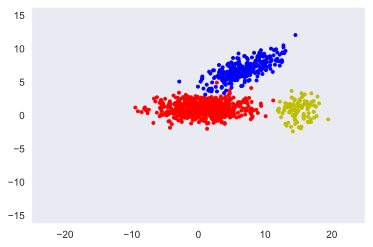

In [11]:
print("Task 1 part b")
trainsize=1000
d =2
p1=0.6
p2=0.3
p3=0.1
listofP=[p1,p2,p3]

μ1=np.array([1,1])
μ2=np.array([7,7])
μ3=np.array([15,1])
listofμ=[μ1,μ2,μ3]

Σ1=np.array([[12,0],[0,1]])
Σ2=np.array([[8,3],[3,2]])
Σ3=np.array([[2,0],[0,2]])

listofΣ=[Σ1,Σ2,Σ3]

test_data=createMultivariateClassData(3,trainsize,listofP,listofμ,listofΣ)

x =test_data[1][50]
print("sample of dataset:",test_data[0][1],test_data[0][2],"....",test_data[0][5])

plt.plot(test_data[0][:,0], test_data[0][:,1], 'r.')
plt.plot(test_data[1][:,0], test_data[1][:,1], 'b.')
plt.plot(test_data[2][:,0], test_data[2][:,1], 'y.')
plt.axis('equal')
plt.xlim(-25, 25)
plt.ylim(-8, 8)
plt.grid()
# # Try classifier 
# bayes_classifier(x,listofμ,listofΣ,listofP,d)
# euclidean_classifier(x,listofμ,listofΣ)
# mahalanobis_classifier(x,listofμ,listofΣ)

### ![alt text](part2task2.png "part2task2")

Task 2 part a
sample of dataset X1: [1.03603374 1.94526069] [-1.73371673  2.18513455] .... [ 1.04526171 -1.81112611]

 Task 2 part b
X-sample:
[10.014268    5.10958947]
Bayesian classification for X-sample to class 1 = -16.69636337664009
Bayesian classification for X-sample to class 2 = -5.965344808053378
Bayesian classification for X-sample to class 3 = -11.017858384781679
By maximum Bayesian classification belongs to >> class 2  
 *********************** 
 
X-sample:
[10.014268    5.10958947]
Euclidean distance for X-sample to class 1 = 98.14575315827935
Euclidean distance for X-sample to class 2 = 12.29760460958565
Euclidean distance for X-sample to class 3 = 52.71771322341206
By minimum euclidean distance classifier belongs to >> class 2  
 *********************** 
 
X-sample:
[10.014268    5.10958947]
Mahalanobis distance for X-sample to class 1 = 24.536438289569837
Mahalanobis distance for X-sample to class 2 = 3.0744011523964123
Mahalanobis distance for X-sample to class 3 = 13.

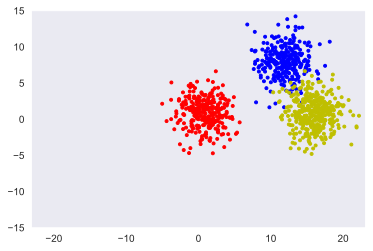

In [12]:
print("Task 2 part a")
trainsize=1000
d =2
p1=p2=p3=0.3
listofP=[p1,p2,p3]

μ1=np.array([1,1])
μ2=np.array([12,8])
μ3=np.array([16,1])
listofμ=[μ1,μ2,μ3]

Σ1=Σ2=Σ3=4*np.identity(2)
listofΣ=[Σ1,Σ2,Σ3]
test_data=createMultivariateClassData(3,trainsize,listofP,listofμ,listofΣ)

x =test_data[1][50]
print("sample of dataset X1:",test_data[0][1],test_data[0][2],"....",test_data[0][5])

plt.plot(test_data[0][:,0], test_data[0][:,1], 'r.')
plt.plot(test_data[1][:,0], test_data[1][:,1], 'b.')
plt.plot(test_data[2][:,0], test_data[2][:,1], 'y.')
plt.axis('equal')
plt.xlim(-25, 25)
plt.ylim(-15, 15)
plt.grid()
# # Try classifier 

print("\n Task 2 part b")

bayes_classifier(x,listofμ,listofΣ,listofP,d)
euclidean_classifier(x,listofμ,listofΣ)
mahalanobis_classifier(x,listofμ,listofΣ)
classification_error_Bayesian(test_data,listofμ,listofΣ,listofP,trainsize)
classification_error_Euclidian(test_data,listofμ,trainsize)
classification_error_mahalanobis(test_data,listofμ,listofΣ,trainsize)

### ![alt text](part2task3.png "part2task3")

Task 3 part a
sample of dataset X2: [3.43211619 2.33612455] [0.59114614 2.26545511] .... [0.67090435 1.56397736]

 Task 3 part b
X-sample:
[11.76467215  4.47096511]
Bayesian classification for X-sample to class 1 = -17.410832297395686
Bayesian classification for X-sample to class 2 = -5.148275717946543
Bayesian classification for X-sample to class 3 = -11.869770949779149
By maximum Bayesian classification belongs to >> class 2  
 *********************** 
 
X-sample:
[11.76467215  4.47096511]
Euclidean distance for X-sample to class 1 = 127.92576541569511
Euclidean distance for X-sample to class 2 = 11.392708037231454
Euclidean distance for X-sample to class 3 = 29.985600766807565
By minimum euclidean distance classifier belongs to >> class 2  
 *********************** 
 
X-sample:
[11.76467215  4.47096511]
Mahalanobis distance for X-sample to class 1 = 25.96537613108103
Mahalanobis distance for X-sample to class 2 = 1.440262972182743
Mahalanobis distance for X-sample to class 3 = 14.88

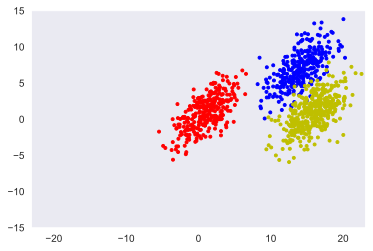

In [13]:
print("Task 3 part a")
trainsize=1000
d =2
p1=p2=p3=0.3
listofP=[p1,p2,p3]

μ1=np.array([1,1])
μ2=np.array([14,7])
μ3=np.array([16,1])
listofμ=[μ1,μ2,μ3]

Σ1=Σ2=Σ3=np.array([[5,3],[3,5]])
listofΣ=[Σ1,Σ2,Σ3]
test_data=createMultivariateClassData(3,trainsize,listofP,listofμ,listofΣ)

x =test_data[1][50]
print("sample of dataset X2:",test_data[0][1],test_data[0][2],"....",test_data[0][5])

plt.plot(test_data[0][:,0], test_data[0][:,1], 'r.')
plt.plot(test_data[1][:,0], test_data[1][:,1], 'b.')
plt.plot(test_data[2][:,0], test_data[2][:,1], 'y.')
plt.axis('equal')
plt.xlim(-25, 25)
plt.ylim(-15, 15)
plt.grid()
# # Try classifier 

print("\n Task 3 part b")

bayes_classifier(x,listofμ,listofΣ,listofP,d)
euclidean_classifier(x,listofμ,listofΣ)
mahalanobis_classifier(x,listofμ,listofΣ)
classification_error_Bayesian(test_data,listofμ,listofΣ,listofP,trainsize)
classification_error_Euclidian(test_data,listofμ,trainsize)
classification_error_mahalanobis(test_data,listofμ,listofΣ,trainsize)

### ![alt text](part2task4.png "part2task4")

Task 4 part a
sample of dataset X3: [0.82968537 2.10931396] [-2.68561965 -0.88606776] .... [1.3590083 2.0294761]

 Task 4 part b
X-sample:
[6.50301838 1.24807841]
Bayesian classification for X-sample to class 1 = -8.22263294190457
Bayesian classification for X-sample to class 2 = -5.954058959451735
Bayesian classification for X-sample to class 3 = -7.421170711878988
By maximum Bayesian classification belongs to >> class 2  
 *********************** 
 
X-sample:
[6.50301838 1.24807841]
Euclidean distance for X-sample to class 1 = 30.344754174149443
Euclidean distance for X-sample to class 2 = 26.305796048763188
Euclidean distance for X-sample to class 3 = 20.284386603089825
By minimum euclidean distance classifier belongs to >> class 3  
 *********************** 
 
X-sample:
[6.50301838 1.24807841]
Mahalanobis distance for X-sample to class 1 = 7.417127163172135
Mahalanobis distance for X-sample to class 2 = 2.879979198266467
Mahalanobis distance for X-sample to class 3 = 5.814202703120

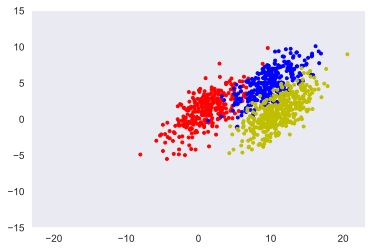

In [14]:
print("Task 4 part a")
trainsize=1000
d =2
p1=p2=p3=0.3
listofP=[p1,p2,p3]

μ1=np.array([1,1])
μ2=np.array([10,5])
μ3=np.array([11,1])
listofμ=[μ1,μ2,μ3]

Σ1=Σ2=Σ3=np.array([[7,4],[4,5]])
listofΣ=[Σ1,Σ2,Σ3]
test_data=createMultivariateClassData(3,trainsize,listofP,listofμ,listofΣ)

x =test_data[1][50]
print("sample of dataset X3:",test_data[0][1],test_data[0][2],"....",test_data[0][5])

plt.plot(test_data[0][:,0], test_data[0][:,1], 'r.')
plt.plot(test_data[1][:,0], test_data[1][:,1], 'b.')
plt.plot(test_data[2][:,0], test_data[2][:,1], 'y.')
plt.axis('equal')
plt.xlim(-25, 25)
plt.ylim(-15, 15)
plt.grid()
# # Try classifier 

print("\n Task 4 part b")

bayes_classifier(x,listofμ,listofΣ,listofP,d)
euclidean_classifier(x,listofμ,listofΣ)
mahalanobis_classifier(x,listofμ,listofΣ)
classification_error_Bayesian(test_data,listofμ,listofΣ,listofP,trainsize)
classification_error_Euclidian(test_data,listofμ,trainsize)
classification_error_mahalanobis(test_data,listofμ,listofΣ,trainsize)

### ![alt text](part2task5.png "part2task5")

### ![alt text](part2task6.png "part2task6")

Task 6 part a
sample of dataset X4: [-0.19476212  1.22083609] [ 3.39435706 -0.54208431] .... [2.84387276 2.70281987]
sample of dataset X5: [0.34440989 0.91667995] [1.03181732 1.36099211] .... [-0.2230316   2.57508665]


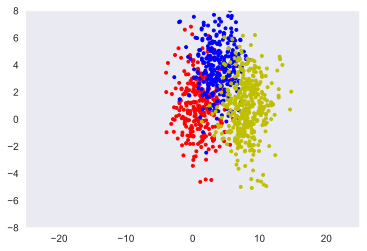

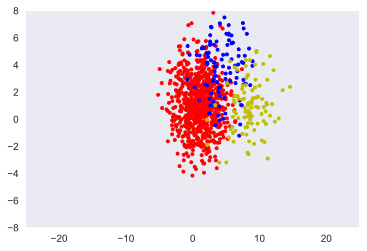

In [15]:
print("Task 6 part a")
trainsize=1000
d =2
p1X4=p2X4= p3X4=0.3
listofPX4=[p1X4,p2X4,p3X4]

p1X5=0.8
p2X5=0.1
p3X5=0.1
listofPX5=[p1X5,p2X5,p3X5]

μ1=np.array([1,1])
μ2=np.array([4,4])
μ3=np.array([8,1])
listofμ=[μ1,μ2,μ3]

Σ1=Σ2=Σ3=4*np.identity(2)
listofΣ=[Σ1,Σ2,Σ3]

dataset_X4=createMultivariateClassData(3,trainsize,listofPX4,listofμ,listofΣ)
dataset_X5=createMultivariateClassData(3,trainsize,listofPX5,listofμ,listofΣ)

x =dataset_X4[1][50]
print("sample of dataset X4:",dataset_X4[0][1],dataset_X4[0][2],"....",dataset_X4[0][5])
print("sample of dataset X5:",dataset_X5[0][1],dataset_X5[0][2],"....",dataset_X5[0][5])

# fig, axs = plt.subplots(figsize=(8, 8), nrows=2)
# axs[0].plot(dataset_X4[0][:, 0], dataset_X4[0][:, 1], 'r.')
# axs[0].plot(dataset_X4[1][:, 0], dataset_X4[1][:, 1], 'b.')
# axs[0].plot(dataset_X4[2][:, 0], dataset_X4[2][:, 1], 'y.')
# axs[0].set_title("Dataset X4")
# axs[1].plot(dataset_X5[0][:, 0], dataset_X5[0][:, 1], 'r.')
# axs[1].plot(dataset_X5[1][:, 0], dataset_X5[1][:, 1], 'b.')
# axs[1].plot(dataset_X5[2][:, 0], dataset_X5[2][:, 1], 'y.')
# _ = axs[1].set_title("Dataset X5")
plt.figure(1)
plt.plot(dataset_X4[0][:,0], dataset_X4[0][:,1], 'r.')
plt.plot(dataset_X4[1][:,0], dataset_X4[1][:,1], 'b.')
plt.plot(dataset_X4[2][:,0], dataset_X4[2][:,1], 'y.')
plt.xlim(-25, 25)
plt.ylim(-8, 8)
plt.grid()

plt.figure(2)
plt.plot(dataset_X5[0][:,0], dataset_X5[0][:,1], 'r.')
plt.plot(dataset_X5[1][:,0], dataset_X5[1][:,1], 'b.')
plt.plot(dataset_X5[2][:,0], dataset_X5[2][:,1], 'y.')
plt.xlim(-25, 25)
plt.ylim(-8, 8)
plt.grid()


In [16]:
print("Task 6 part b")

X4_Sample =dataset_X4[0][50]
X5_Sample =dataset_X5[0][50]

# # Try classifier 
# dataset X4
print("For dataset X4 the classifier: ")
bayes_classifier(X4_Sample,listofμ,listofΣ,listofPX4,d)
euclidean_classifier(X4_Sample,listofμ,listofΣ)
mahalanobis_classifier(X4_Sample,listofμ,listofΣ)
classification_error_Bayesian(dataset_X4,listofμ,listofΣ,listofPX4,trainsize)
classification_error_Euclidian(dataset_X4,listofμ,trainsize)
classification_error_mahalanobis(dataset_X4,listofμ,listofΣ,trainsize)

# dataset X5
print("\nــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــ\n","For dataset X5 the classifier: ")
bayes_classifier(X5_Sample,listofμ,listofΣ,listofPX5,d)
euclidean_classifier(X5_Sample,listofμ,listofΣ)
mahalanobis_classifier(X5_Sample,listofμ,listofΣ)
classification_error_Bayesian(dataset_X5,listofμ,listofΣ,listofPX5,trainsize)
classification_error_Euclidian(dataset_X5,listofμ,trainsize)
classification_error_mahalanobis(dataset_X5,listofμ,listofΣ,trainsize)

Task 6 part b
For dataset X4 the classifier: 
X-sample:
[3.8112952  1.40147708]
Bayesian classification for X-sample to class 1 = -5.436214796918031
Bayesian classification for X-sample to class 2 = -5.276635589518501
Bayesian classification for X-sample to class 3 = -6.641448205640158
By maximum Bayesian classification belongs to >> class 2  
 *********************** 
 
X-sample:
[3.8112952  1.40147708]
Euclidean distance for X-sample to class 1 = 8.06456452050287
Euclidean distance for X-sample to class 2 = 6.787930861306633
Euclidean distance for X-sample to class 3 = 17.70643179027989
By minimum euclidean distance classifier belongs to >> class 2  
 *********************** 
 
X-sample:
[3.8112952  1.40147708]
Mahalanobis distance for X-sample to class 1 = 2.0161411301257175
Mahalanobis distance for X-sample to class 2 = 1.6969827153266583
Mahalanobis distance for X-sample to class 3 = 4.4266079475699724
By minimun mahalanobis distance classifier belongs to >> class 2  
 ***********